## Gradient Boosting Trees

Neste notebook, vamos aprender um método de classificação muito poderoso, cuja ideia é fácil de entender, mas cuja formulação matemática nem tanto.

A ideia do método é muito antiga e fora da comunidade de aprendizado é conhecida como teorema do juri de Condorcet ("Essay sur l'applicacion de l'analyse à la probabilités dés decisions" de 1785). Neste artigo do marquês de Condorcet, ele se coloca a questão de quantas pessoas são necessárias num juri para este tomar uma decisão correta.

O teorema diz que, num juri que tem que decidir entre duas decisões, sendo que uma delas é a correta, se cada pessoa escolher independentemente a decisão correta com probabilidade p, se essa probabilidade for maior que 1/2 (isto é, cada membro do juri tem probabilidade de votar corretamente maior do que 1/2), então adicionando mais membros ao juri, aumenta as chances que o juri se decida pela decisão correta.

Na área de aprendizado de máquina, essa ideia e o nome "boosting" (incremento) aparece no artigo de Michael Kearns: "Thoughts on Hypothesis Boosting". Neste artigo, Kearns introduz o conceito de classificadores fracos, ou hipóteses fracas ("weak learners", ou "weak hypothesis"), que são classificadores que têm performance um pouco melhor que um classificador aleatório, e apresenta algumas ideias de como juntar classificadores fracos para criar um classificador melhor.

Ideias como essa avançaram através de diversos artigos e serviram como faísca para a criação de uma nova área de pesquisa: combinação de classificadores ("ensemble learning").

Aqui, vamos nos restringir a um desses avanços, Gradient Boosting Regression Trees (ou simplesmente, Gradient Boosting Trees), cuja principal contribuição foi dada por Jerome H. Friedman, um pesquisador de Stanford, que criou, dentre outras coisas, o algoritmo CART para indução de árvores de decisão. No artigo: "Greedy Function Approximation: A Gradient Boosting Machine" (http://www-stat.stanford.edu/~jhf/ftp/trebst.pdf), Friedman apresenta o problema da seguinte maneira:

Dado um conjunto finito de exemplos do tipo $\{\bf{x}_i,y_i\}$, onde $\bf{x}_i \in R^d$ e $y_i \in R$, e $y_i = F(\bf{x}_i)$ ($F:R^d \rightarrow R$ é uma função desconhecida) e uma função de custo $L$, podemos aproximar $F$ por uma função $G$ estimada, minimizando o valor esperado da função de custo $L(y,G(\bf{x}))$ sobre todos os valores possíveis da distribuição conjunta discreta $(y,\bf{x})$ escrevendo $G$ como uma função iterativa $G_m$ da seguinte forma:
$$
G_m(\bf{x}) = G_{m-1}(\bf{x}) + \rho_m h(\bf{x};\bf{a}_m)
$$
onde $\rho_m$ é uma taxa de aprendizado (que pode ser dada, ou estimada), $\bf{a}_m$ são parâmetros a serem estimados e $\{h(\bf{x};\bf{a}_m)\}_1^M$ são um conjunto de funções de base que, neste caso, podem ser árvores de decisão pouco profundas.

Em outras palavras, a função $F$ pode ser aproximada por uma soma de contribuições de árvores de decisão. No entanto, vale notar que uma vez calculada a árvore no passo $m-1$, ela está fixa e não vai mais ser modificada na próxima iteração.

A otimização é usualmente feita pelo algoritmo do gradiente descendente e a teoria completa sobre o assunto (Gradient Boosting Machine) é extensa e foge ao escopo deste mini-curso. 

### Exemplo de aplicação

Neste exemplo, revisitamos um exemplo de regressão com árvores de decisão e comparamos qualitativamente com o GBRT. Para isso, vamos novamente usar o sklearn, desta vez o método GradientBoostingRegressor da classe ensemble:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

Note que, sendo um classificador mais complexo, que é uma somatória de classificadores, o número de parâmetros é bem maior. No exemplo abaixo, usamos quatro deles:

- Número de iterações/estimadores: n_estimators;
- Taxa de aprendizado: learning_rate;
- Profundidade máxima de cada árvores: max_depth;
- Semente aleatória: random_state;

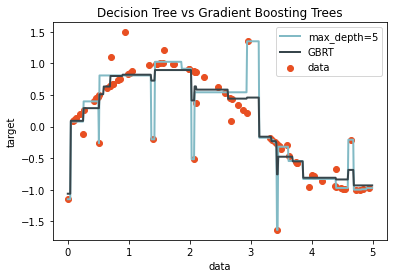

In [2]:
# Importa os módulos necessários

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Cria um conjunto de dados aleatório
# inicializa a semente
rng = np.random.RandomState(1)

# Cria um domínio de 80 pontos em posições aleatórias do eixo X.
X = np.sort(5 * rng.rand(80, 1), axis=0)

# Cria uma função que é um seno adicionado a um ruído.
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Calcula a regressão baseada em DT
regrDT = DecisionTreeRegressor(max_depth=5)
regrDT.fit(X, y)

# Calcula a regressão baseada em GBRT
GBRT = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.5,     
                                  max_depth=1, 
                                  random_state=0)
GBRT.fit(X,y)


# Cria um domínio de pontos arranjados uniformemente no eixo X
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Prediz o valor da função baseada na DT
y_DT = regrDT.predict(X_test)

# Prediz o valor da função baseada no GBRT
y_GBRT = GBRT.predict(X_test)

# Apresenta os resultados num gráfico
plt.figure()
plt.scatter(X, y, c="#E84F22", label="data")
plt.plot(X_test, y_DT, color="#82BAC5", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_GBRT, color="#37454B", label="GBRT", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree vs Gradient Boosting Trees")
plt.legend()
plt.show()

#### Exercício: Experimente mudar os valores dos parâmetros da GBRT e veja como ela se comporta.

### Outro exemplo do sklearn

O exemplo abaixo é uma adaptação do exemplo que está no site do sklearn:

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

que foi feito por Peter Prettenhover. 

O dataset usado é o "Boston Housing", que contém informções do censo americano sobre domicílios na área de Boston Massachusetts. Um dos lugares que esse dataset está arquivado é aqui:

http://lib.stat.cmu.edu/datasets/boston

O conjunto contém 506 dados, 14 atributos, sendo que um deles (MEDV - "Median value of owner-occupied homes in $1000" ) é o preço das casas, que é usado normalmente como variável alvo. Uma coisa a ser notada é que os preços altos foram censurados.

O objetivo do exemplo é predizer os preços das casas (MEDV) baseado nesses 13 atributos.

In [19]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

# Adaptado para o curso de aprendizado de máquina.

# Importa as bibliotecas necessárias.
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# Carrega o conjunto de dados.
boston = datasets.load_boston()

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [20]:
# Usando o método DESCR, do boston dataset, imprima as informações sobre o dataset
# A ideia é apagar esta linha e deixar como exercício.

In [21]:
# Exercício: Usando o método head, veja os primeiros valores do dataset.

In [22]:
# Exercício: Escolha dois atributos que você ache que tem mais correlação 
# com os preços das casas e faça um par de gráficos para ver se essa relação
# realmente existe.

In [27]:
# Cria um conjunto de dados rotulados, embaralhando a ordem dos dados originais.
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)

# Separa o conjunto em treino (90%) e teste 
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# Ajusta a regressão baseada em GBRT
# Note que no exemplo os parâmetros são passados de uma forma diferente
# da vista anteriormente. 

# Primeiro cria-se um dicionário de parâmetros
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# Passa-se a referência do dicionário para a função e
# cria-se o modelo.
clf = GradientBoostingRegressor(**params)

# Ajusta o modelo com os dados de treinamento.
clf.fit(X_train, y_train)

# Calcula-se o erro de treinamento
mseTrain = mean_squared_error(y_train, clf.predict(X_train))
print("MSE Training: %.4f" % mseTrain)

MSE Training: 1.7677


In [ ]:
# Exercício: Mofifique as duas últimas linhas para calcular o erro no
# conjunto de testes

Text(0, 0.5, 'Deviance')

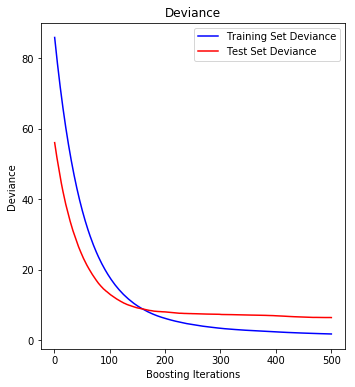

In [28]:
# Apresenta um gráfico do erro de treinamento e de teste para cada iteração do GBRT

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

# Olhe o que o método staged_predict faz neste help:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.staged_predict
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

# Apresenta o gráfico    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

### Importância das variáveis

Um subproduto do algoritmo GBRT é o cálculo da importância 
de cada característica. O exemplo abaixo apresenta a importância
relativa emum gráfico.

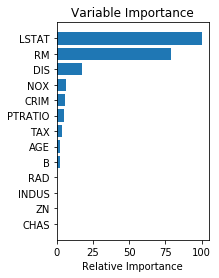

In [30]:
# Extrai a importância calculada de cada característica.
feature_importance = clf.feature_importances_

# Calcula a importância relativa em relação à máxima importância.
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Apresenta um gráfico por ordem de importância.
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()